In [4]:
import swarms
import pread as pr
import numpy as np
import matplotlib.pyplot as plt
from pread import BaraffeModelFixedTime, BaraffeModelFixedMass

from swarms import LSUN, MSUN, TSUN, PC, AU, MEARTH, REARTH, RJUP, MJUP, JY, YEAR, MICRON

try:
    plt.style.use('paper')
except:
    pass

In [2]:
lambdas = np.logspace(-7, -3, 200)
g = 0.32 # assume phase function for Lambert sphere at maximum extension from host star

time = 3.e7 * YEAR # seconds
star = swarms.Star(L=LSUN, M=MSUN, T=TSUN, d=10*PC)
earth = swarms.Planet(star, M=MEARTH, R=REARTH, a=1*AU, Q=0.3)
jup = swarms.Planet(star, M=MJUP, R=RJUP, a=1*AU, Q=0.5)
# R = None gets radius from Baraffe models at the given Z and time
supjup = swarms.Planet(star, M=5*MJUP, R=None, a=1*AU, Q=0.5, Z='002', age=time)     

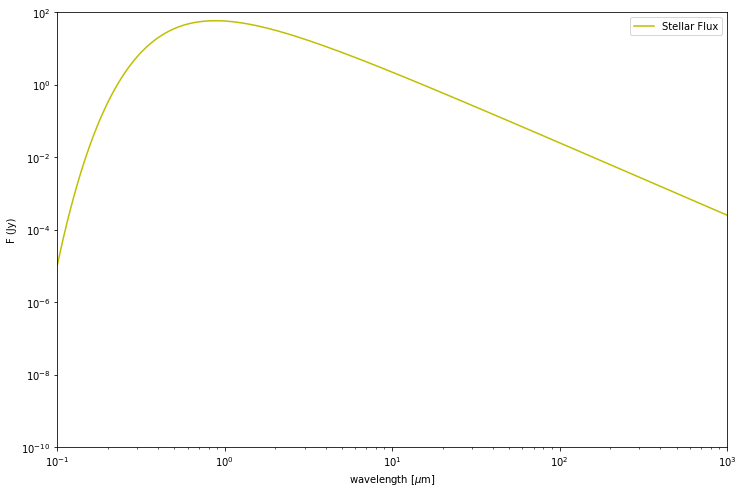

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
ax.loglog(lambdas/MICRON, star.computeFthermal(lambdas, star.d)/JY, 'y', label="Stellar Flux")

ax.set_xlabel(r"wavelength [$\mu$m]")
ax.set_ylabel("F (Jy)")
ax.set_ylim([10e-11, 1e2])
ax.set_xlim([1.e-1, 1.e3])
ax.legend()
#fig.savefig('/Users/dtamayo/Desktop/f1.png', bbox_inches='tight')

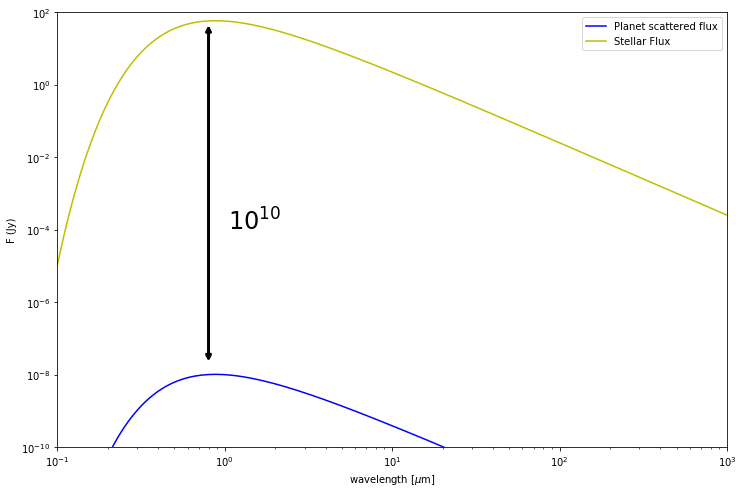

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
ax.loglog(lambdas*1e6, earth.computeFscat(lambdas, g)/JY, 'b', label="Planet scattered flux")
ax.loglog(lambdas*1e6, star.computeFthermal(lambdas, star.d)/JY, 'y', label="Stellar Flux")

ax.annotate(s='', xy=(0.8,2.e-8), xytext=(0.8,5.e1), arrowprops=dict(arrowstyle='<->', lw=3))
ax.text(1.05, 1.e-4, r'$10^{10}$', fontsize=24)

ax.set_xlabel(r"wavelength [$\mu$m]")
ax.set_ylabel("F (Jy)")
ax.set_ylim([10e-11, 1e2])
ax.set_xlim([1.e-1, 1.e3])
ax.legend()

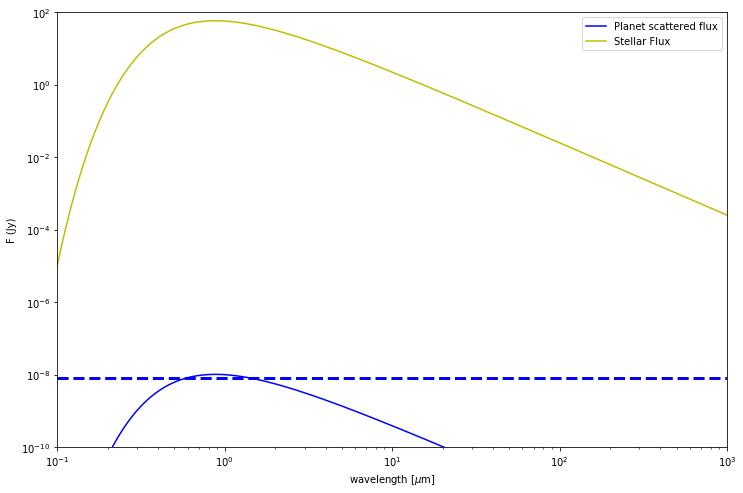

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
ax.loglog(lambdas*1e6, earth.computeFscat(lambdas, g)/JY, 'b', label="Planet scattered flux")
ax.loglog(lambdas*1e6, star.computeFthermal(lambdas, star.d)/JY, 'y', label="Stellar Flux")

ax.hlines(8.e-9, 1.e-1, 1e3, lw=3, linestyle='--', color='b')

ax.set_xlabel(r"wavelength [$\mu$m]")
ax.set_ylabel("F (Jy)")
ax.set_ylim([10e-11, 1e2])
ax.set_xlim([1.e-1, 1.e3])
ax.legend()

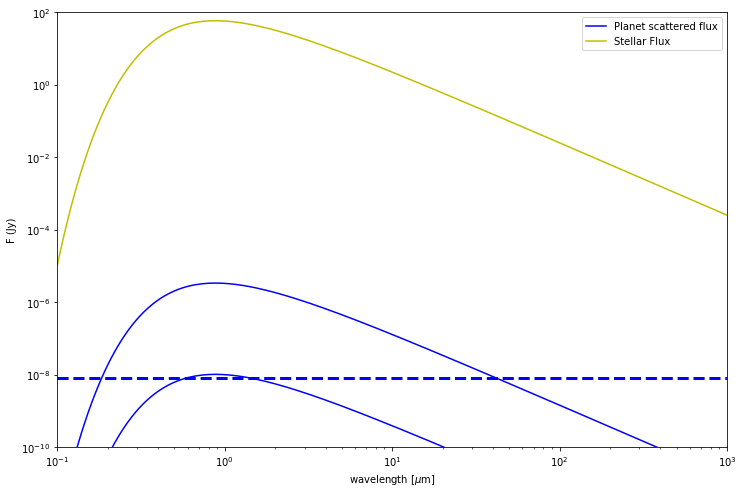

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
ax.loglog(lambdas/MICRON, earth.computeFscat(lambdas, g)/JY, 'b', label="Planet scattered flux")
ax.loglog(lambdas/MICRON, supjup.computeFscat(lambdas, g)/JY, 'b')
ax.loglog(lambdas/MICRON, star.computeFthermal(lambdas, star.d)/JY, 'y', label="Stellar Flux")

ax.hlines(8.e-9, 1.e-1, 1e3, lw=3, linestyle='--', color='b')

ax.set_xlabel(r"wavelength [$\mu$m]")
ax.set_ylabel("F (Jy)")
ax.set_ylim([10e-11, 1e2])
ax.set_xlim([1.e-1, 1.e3])
ax.legend()

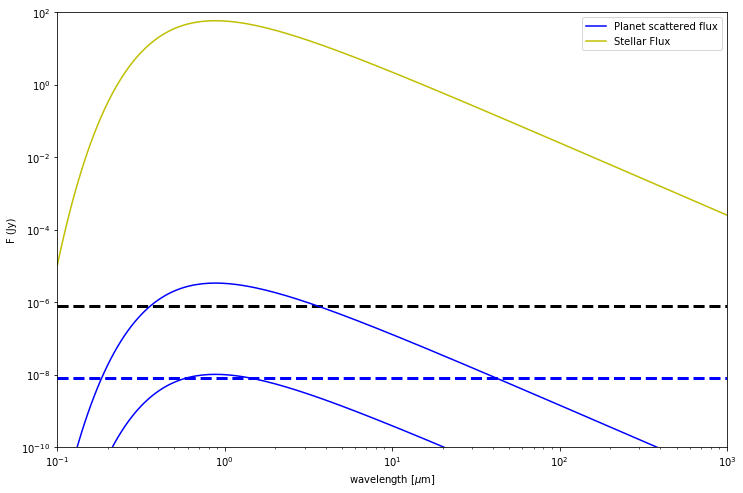

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
ax.loglog(lambdas/MICRON, earth.computeFscat(lambdas, g)/JY, 'b', label="Planet scattered flux")
ax.loglog(lambdas/MICRON, supjup.computeFscat(lambdas, g)/JY, 'b')
ax.loglog(lambdas/MICRON, star.computeFthermal(lambdas, star.d)/JY, 'y', label="Stellar Flux")

ax.hlines(8.e-9, 1.e-1, 1e3, lw=3, linestyle='--', color='b')
ax.hlines(8.e-7, 1.e-1, 1e3, lw=3, linestyle='--', color='k')

ax.set_xlabel(r"wavelength [$\mu$m]")
ax.set_ylabel("F (Jy)")
ax.set_ylim([10e-11, 1e2])
ax.set_xlim([1.e-1, 1.e3])
ax.legend()

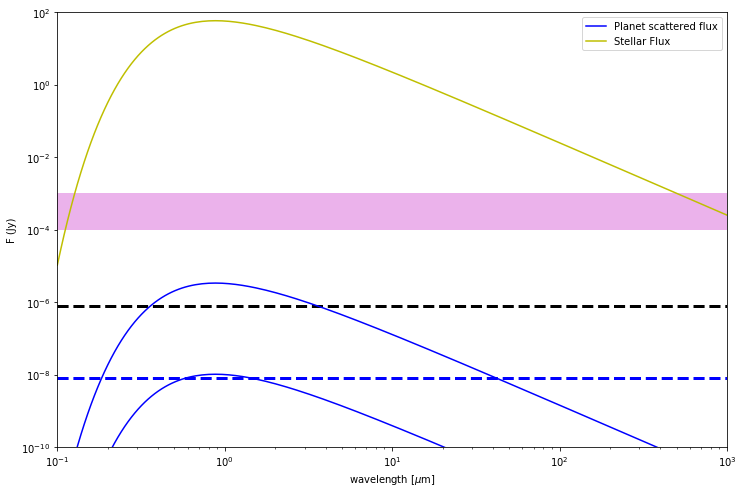

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
ax.loglog(lambdas*1e6, earth.Fscat(lambdas, g)/Jansky, 'b', label="Planet scattered flux")
ax.loglog(lambdas*1e6, supjup.Fscat(lambdas, g)/Jansky, 'b')
ax.loglog(lambdas*1e6, star.F(lambdas, star.d)/Jansky, 'y', label="Stellar Flux")

ax.hlines(8.e-9, 1.e-1, 1e3, lw=3, linestyle='--', color='b')
ax.hlines(8.e-7, 1.e-1, 1e3, lw=3, linestyle='--', color='k')
ax.fill_between(lambdas*1e6, 1.e-4, 1.e-3, facecolor='m', alpha=0.3)

ax.set_xlabel(r"wavelength [$\mu$m]")
ax.set_ylabel("F (Jy)")
ax.set_ylim([10e-11, 1e2])
ax.set_xlim([1.e-1, 1.e3])
ax.legend()

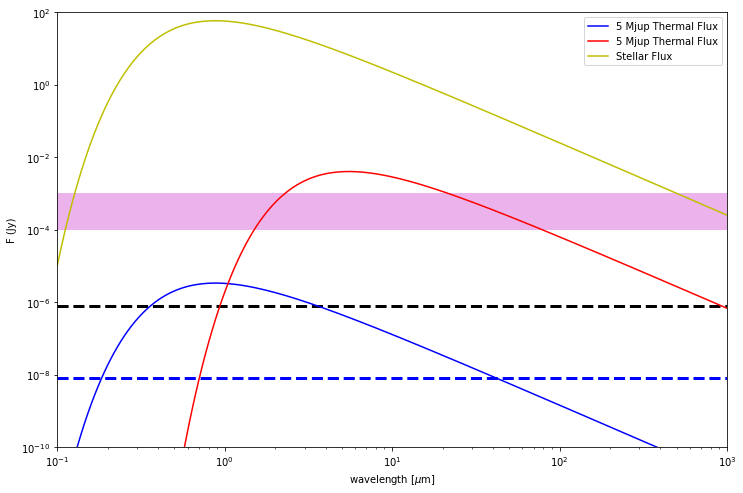

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
ax.loglog(lambdas*1e6, supjup.Fscat(lambdas, g)/Jansky, 'b', label='5 Mjup Thermal Flux')
ax.loglog(lambdas*1e6, supjup.Fthermal(lambdas)/Jansky, 'r', label='5 Mjup Thermal Flux')
ax.loglog(lambdas*1e6, star.F(lambdas, star.d)/Jansky, 'y', label="Stellar Flux")

ax.hlines(8.e-9, 1.e-1, 1e3, lw=3, linestyle='--', color='b')
ax.hlines(8.e-7, 1.e-1, 1e3, lw=3, linestyle='--', color='k')
ax.fill_between(lambdas*1e6, 1.e-4, 1.e-3, facecolor='m', alpha=0.3)

ax.set_xlabel(r"wavelength [$\mu$m]")
ax.set_ylabel("F (Jy)")
ax.set_ylim([10e-11, 1e2])
ax.set_xlim([1.e-1, 1.e3])
ax.legend()

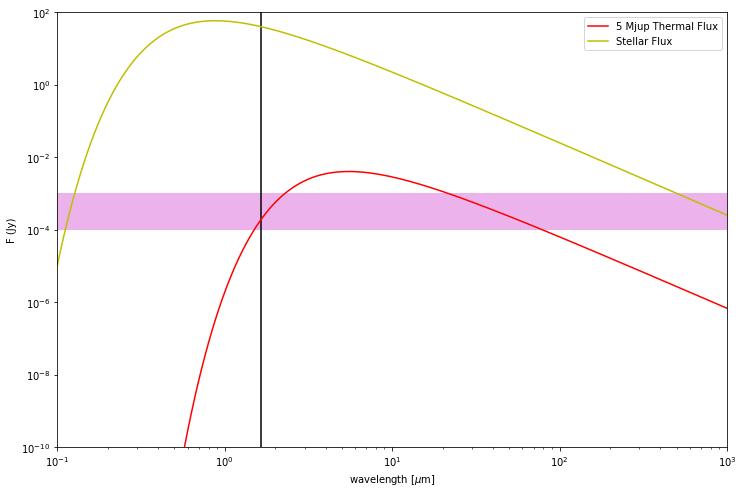

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
#ax.loglog(lambdas*1e6, supjup.Fscat(lambdas, g)/Jansky, 'b', label='5 Mjup Thermal Flux')
ax.loglog(lambdas*1e6, supjup.Fthermal(lambdas)/Jansky, 'r', label='5 Mjup Thermal Flux')
ax.loglog(lambdas*1e6, star.F(lambdas, star.d)/Jansky, 'y', label="Stellar Flux")

#ax.hlines(8.e-9, 1.e-1, 1e3, lw=3, linestyle='--', color='b')
#ax.hlines(8.e-7, 1.e-1, 1e3, lw=3, linestyle='--', color='k')
ax.fill_between(lambdas*1e6, 1.e-4, 1.e-3, facecolor='m', alpha=0.3)
ax.vlines(1.65, 1.e-10, 1e3, color='k')
ax.set_xlabel(r"wavelength [$\mu$m]")
ax.set_ylabel("F (Jy)")
ax.set_ylim([10e-11, 1e2])
ax.set_xlim([1.e-1, 1.e3])
ax.legend()